# CS109b Final Project: Milestone 1
---
Group 6: Chris Chen, Phillip Huang, Harry Xue, Ted Zhu

In [47]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# allow multiple outs per cell in Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import
df = pd.read_csv("movie_metadata.csv")

## Evaluating the relationship between genre and number of faces in movie posters

From action films which feature the faces of multiple action stars to nature documentaries which instead feature stunning landscapes, movie posters feature different numbers of faces -- a fact which we may be able to exploit later to classify movie genres based on posters. 

In [18]:
faces_per_genre = {}
for _, row in df.iterrows():
    faces = row["facenumber_in_poster"]
    genres = row["splitted genres"]
    for genre in genres:
        if not genre in faces_per_genre:
            faces_per_genre[genre] = [faces]
        else:
            faces_per_genre[genre] += [faces]

In [37]:
df_faces = pd.DataFrame()
df_faces["genre"] = pd.Series()
df_faces["mean_poster_faces"] = pd.Series()

for index, (key, values) in enumerate(faces_per_genre.items()):
    df_faces.loc[index] = key, pd.Series(values).mean()

[0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 7.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 1.0, 6.0, 2.0, 3.0, 2.0, 8.0, 1.0, 0.0, 4.0, 4.0, 0.0, 3.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 6.0, 1.0, 0.0, 0.0, 6.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 3.0, 1.0, 1.0, 0.0, 0.0, nan, 3.0, 0.0, 0.0, 3.0, 1.0, 4.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 5.0, 0.0, 4.0, 0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 2.0, 1.0, 4.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,

In [38]:
df_faces

,genre,mean_poster_faces
0,Sci-Fi,0.985366
1,Crime,1.408324
2,Romance,1.636528
3,Animation,0.425620
4,Music,1.672897
5,Comedy,1.868308
6,War,1.212264
7,Horror,0.628114
8,Film-Noir,1.333333
9,Adventure,1.167573


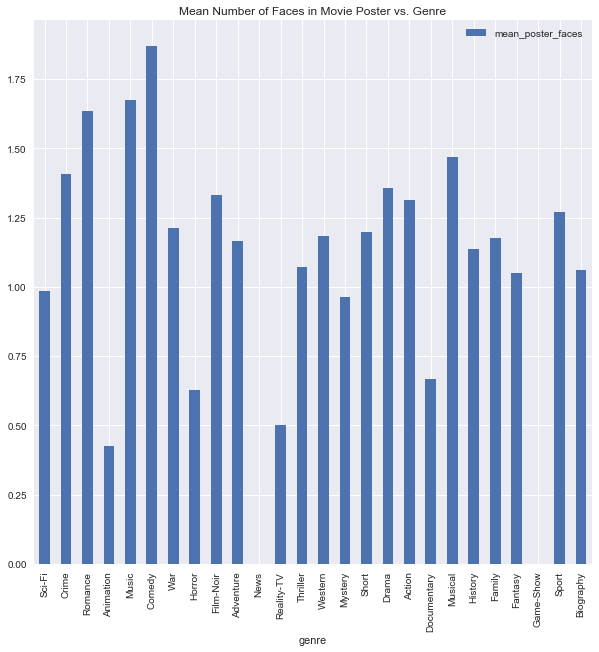

In [51]:
df_faces.plot.bar(x="genre", y="mean_poster_faces", figsize=(10,10), title="Mean Number of Faces in Movie Poster vs. Genre")

We observe from the above that the mean number of faces in movie posters is relatively similar across many genres, though there seem to be a number of genres with fewer mean faces in their posters compared to the rest. For example, genres like animation, horror, reality-tv, and documentary seem to have fewer faces in tehcompard to genres like music, comedy, and action.